In [13]:
import torch
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch.nn as nn
import torch.optim as optim
import nltk
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
# Read the Parquet file
file_path = "train-00000-of-00001.parquet"  # Replace with your Parquet file path
df = pd.read_parquet(file_path)

# Inspect the DataFrame
df

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2
...,...,...
416804,that was what i felt when i was finally accept...,1
416805,i take every day as it comes i m just focussin...,4
416806,i just suddenly feel that everything was fake,0
416807,im feeling more eager than ever to claw back w...,1


In [7]:
# Function to calculate word count
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df

,text,label,word_count
0,i feel awful about it too because it s my job ...,0,26
1,im alone i feel awful,0,5
2,ive probably mentioned this before but i reall...,1,27
3,i was feeling a little low few days back,0,9
4,i beleive that i am much more sensitive to oth...,2,18
...,...,...,...
416804,that was what i felt when i was finally accept...,1,22
416805,i take every day as it comes i m just focussin...,4,39
416806,i just suddenly feel that everything was fake,0,8
416807,im feeling more eager than ever to claw back w...,1,20


In [8]:
# Calculate statistics
min_words = df['word_count'].min()
max_words = df['word_count'].max()
avg_words = df['word_count'].mean()

print(f"Minimum words: {min_words}")
print(f"Maximum words: {max_words}")
print(f"Average words: {avg_words:.2f}")

Minimum words: 1
Maximum words: 178
Average words: 19.21


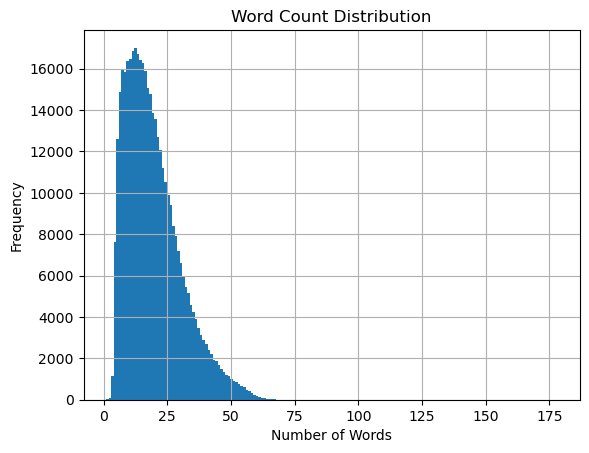

In [11]:
df['word_count'].hist(bins=178)
plt.title("Word Count Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [14]:
# Create Bag of Words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])  # Features
y = df['label']  # Labels

X

<416809x75276 sparse matrix of type '<class 'numpy.int64'>'
	with 6513003 stored elements in Compressed Sparse Row format>

In [15]:
y

0         0
1         0
2         1
3         0
4         2
         ..
416804    1
416805    4
416806    0
416807    1
416808    0
Name: label, Length: 416809, dtype: int64